# Multiclass CNN with Food101

## Import all the libs (Start running this)

In [1]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Import the data (Run this second)

In [2]:
# Download Data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
# Unzip the downloaded file
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

--2024-02-13 14:20:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.174.207, 74.125.23.207, 74.125.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.174.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  29.0MB/s    in 18s     

2024-02-13 14:21:18 (27.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
# Class-Names
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test'
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


### Preprocesses Data (augmentation)

In [4]:
# Preprocess data 9get all of the pixel values between 0 and 1
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_datagen_augmented = ImageDataGenerator(rescale = 1./255, rotation_range=0.2, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir, batch_size = 32, target_size= (224,224)) #Target size, redimension the image to fit in 224 pixels x 224 pixels
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, batch_size = 32, target_size= (224,224), shuffle = True)
test_data = test_datagen.flow_from_directory(test_dir, batch_size = 32, target_size= (224,224))

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Visualize Data

In [ ]:
#Lets visualize our images

def view_random_image(dir, classes):
  # Set up the target directories
  target_folder = dir+'/'+classes
  # Get random
  random_image = random.sample(os.listdir(target_folder), 1)
  # Read in the imahe and plot it using matplotlib
  img  = mpimg.imread(target_folder + '/'+ random_image[0])

  # Plot
  plt.imshow(img)
  plt.title(classes)
  plt.axis('off');

  print(f'Image Shape: {img.shape}')

  #return img

Image Shape: (384, 512, 3)


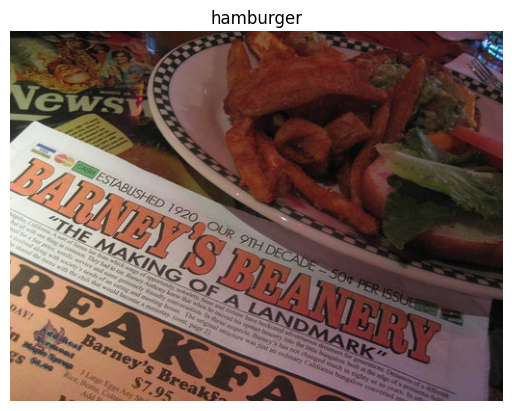

In [ ]:
view_random_image('10_food_classes_all_data/train/', random.choice(class_names))

## Build the Multiclass Model

In [5]:
# Build the CNN model (same as the Tiny VGG )
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid"),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax') # Change to now have 10 neurons, beacause we have 10 classes
])

# Compile the CNN
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics= ['accuracy'])

# Fit the model
history_1 = model1.fit(train_data_augmented, epochs = 5, steps_per_epoch = len(train_data_augmented), validation_data =  test_data, validation_steps  = len(test_data))

Epoch 1/5
235/235 [==============================] - 605s 3s/step - loss: 2.1775 - accuracy: 0.1939 - val_loss: 2.0245 - val_accuracy: 0.2716
Epoch 2/5
235/235 [==============================] - 607s 3s/step - loss: 2.0919 - accuracy: 0.2619 - val_loss: 1.9501 - val_accuracy: 0.3068
Epoch 3/5
235/235 [==============================] - 566s 2s/step - loss: 2.0099 - accuracy: 0.2951 - val_loss: 1.8412 - val_accuracy: 0.3472
Epoch 4/5
235/235 [==============================] - 603s 3s/step - loss: 1.9611 - accuracy: 0.3188 - val_loss: 1.8454 - val_accuracy: 0.3720
Epoch 5/5
235/235 [==============================] - 608s 3s/step - loss: 1.9379 - accuracy: 0.3301 - val_loss: 1.7817 - val_accuracy: 0.3728


## Save Model

In [6]:
model1.save("saved_trainedmodel-multiclassCNN")